In [1]:
import numpy as np
import matplotlib.pyplot as plt
import cv2

In [3]:
# from google.colab import drive
# drive.mount('/content/drive')

Mounted at /content/drive


Text(0.5, 1.0, 'Original Image')

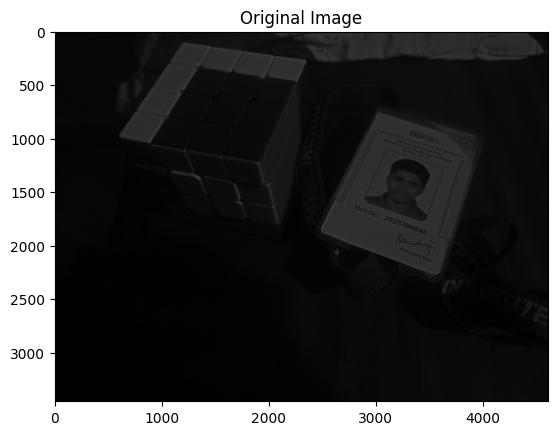

In [2]:
# Load an image
# image = cv2.imread('/content/drive/MyDrive/gray_image.jpeg',cv2.IMREAD_GRAYSCALE)
image = cv2.imread('images/dark_ID_card.jpg',cv2.IMREAD_GRAYSCALE)
plt.imshow(image, cmap='gray')
plt.title('Original Image')

In [3]:
# Function to compute the histogram of the original Image
# It counts number of pixel corresponding to each gray level;
def compute_histogram(image):
    histogram = np.zeros(256, dtype=int)
    for pixel_value in image.flatten():
        histogram[pixel_value] += 1
    return histogram


In [4]:
# Function to perform histogram equalization using normalization
def histogram_equalization(image):

    histogram = compute_histogram(image)

    # Compute the cumulative distribution function (CDF)
    cdf = np.cumsum(histogram)

    # Normalize the CDF to have values in the range [0, 255]
    cdf_normalized = ((cdf - cdf.min()) * 255) / (cdf.max() - cdf.min())
    # Use the CDF values to map pixel values in the original image
    equalized_image = cdf_normalized[image]
    # print(equalized_image)
    return equalized_image.astype(np.uint8)



In [5]:
'''
With refernce to Digital Image Processing
by Rafael C. Gonzalez & Richard E. Woods
'''
#--------------------------------------------------------------------
# Histogram equalization
def histogram_equalization_book(image):
  histogram = compute_histogram(image)

  # MN or count is the total number of pixels in the image
  count = np.sum(histogram)

  ## probability
  pr = np.zeros(256, dtype=float)


  for i in range(256):
    pr[i] = histogram[i]/ count

  histogram_eq = np.zeros(256, dtype=float)
  for k in range(256):
    sum = 0.0
    for j in range(k+1):
      sum+= pr[j]

    histogram_eq[k] = round(255*sum)
  return histogram_eq

In [6]:
def transformation(pixel_value, map):
  return map[pixel_value]

In [7]:
# Perform histogram equalization
equalized_image = histogram_equalization(image)

In [8]:
final_mapping = histogram_equalization_book(image)

In [9]:
mapped_image = final_mapping[image]


Text(0.5, 1.0, 'Histogram Equalization using \n cdf normalization')

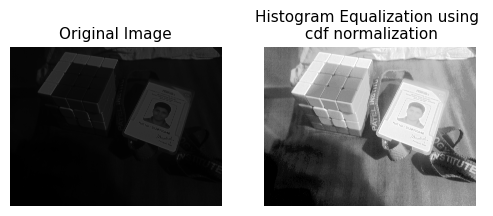

In [10]:
img_fig = plt.figure(figsize=(6, 4))
img_fig.add_subplot(1, 2, 1)
# showing image
plt.imshow(image, cmap='gray')
plt.axis('off')
plt.title('Original Image', fontsize = 11)

img_fig.add_subplot(1, 2, 2)
# showing image
plt.imshow(equalized_image, cmap='gray')
plt.axis('off')
plt.title('Histogram Equalization using \n cdf normalization', fontsize = 11)


Text(0.5, 1.0, 'Histogram Equalization\n (text book method)')

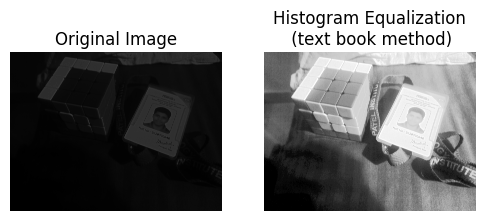

In [11]:
img_fig2 = plt.figure(figsize=(6, 4))
img_fig2.add_subplot(1, 2, 1)
# showing image
plt.imshow(image, cmap='gray')
plt.axis('off')
plt.title('Original Image')

img_fig2.add_subplot(1, 2, 2)
# showing image
plt.imshow(mapped_image, cmap='gray')
plt.axis('off')
plt.title('Histogram Equalization\n (text book method)')


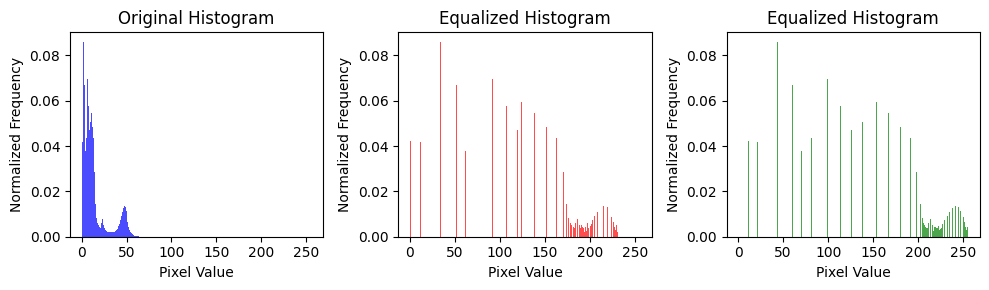

In [12]:
# Plot the histograms of the original and equalized images
plt.figure(figsize=(10, 3))
plt.subplot(1, 3, 1)
plt.hist(image.flatten(), bins=256, range=(0, 256), density=True, color='blue', alpha=0.7)
plt.title('Original Histogram')
plt.xlabel('Pixel Value')
plt.ylabel('Normalized Frequency')

plt.subplot(1, 3, 2)
plt.hist(equalized_image.flatten(), bins=256, range=(0, 256), density=True, color='red', alpha=0.7)
plt.title('Equalized Histogram')
plt.xlabel('Pixel Value')
plt.ylabel('Normalized Frequency')

plt.subplot(1, 3, 3)
plt.hist(mapped_image.flatten(), bins=256, range=(0, 256), density=True, color='green', alpha=0.7)
plt.title('Equalized Histogram')
plt.xlabel('Pixel Value')
plt.ylabel('Normalized Frequency')

plt.tight_layout()
plt.show()


Text(0, 0.5, 'Output Pixels s')

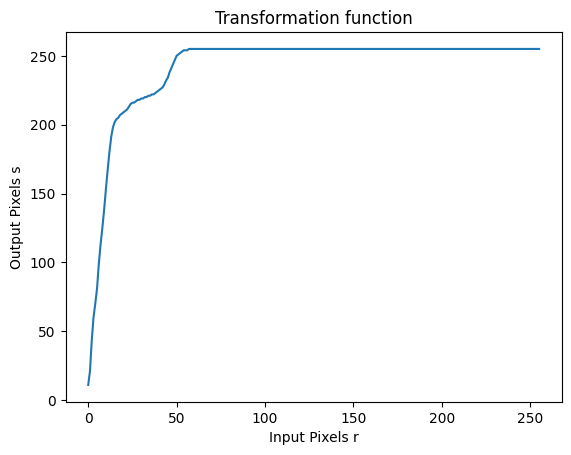

In [13]:
plt.plot(final_mapping)
plt.title('Transformation function')
plt.xlabel('Input Pixels r')
plt.ylabel('Output Pixels s')